<a href="https://colab.research.google.com/github/KirtiNayak11/ML/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 2].values

#Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform feature scaling on training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

#Fitting SVR to the Training set

In [22]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)

SVR()

#Feature scaling for test data set

In [23]:
# Transform test data using the same scaler
X_test_scaled = scaler_X.transform(X_test)

## Predict on scaled test data

In [25]:
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse transform to get actual predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

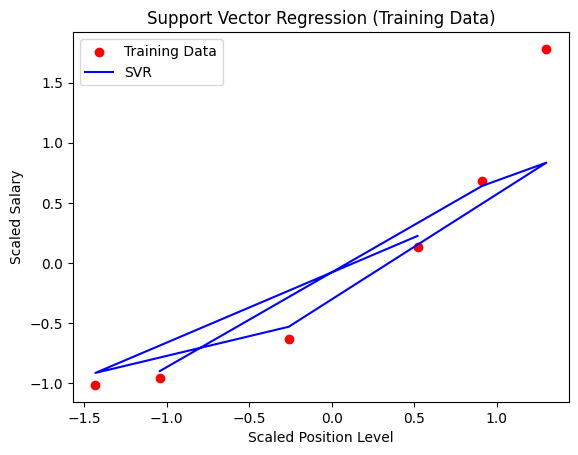

In [29]:
# Visualize the SVR results on training data
plt.scatter(X_train_scaled, y_train_scaled, color='red', label='Training Data')
plt.plot(X_train_scaled, svr.predict(X_train_scaled), color='blue', label='SVR')
plt.title('Support Vector Regression (Training Data)')
plt.xlabel('Scaled Position Level')
plt.ylabel('Scaled Salary')
plt.legend()
plt.show()

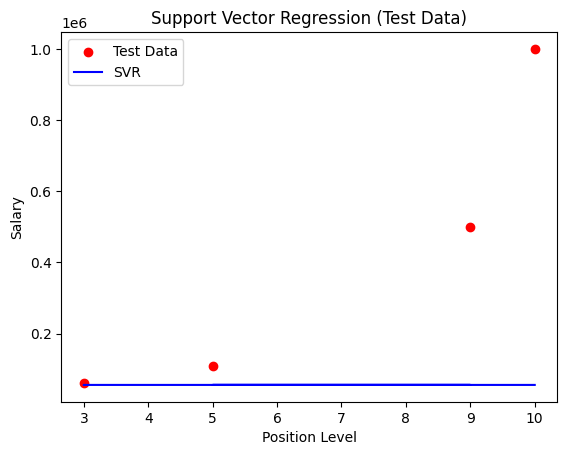

In [30]:
# Transform test set features and make predictions
X_test_scaled = scaler.transform(X_test)
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse transform to get actual predictions
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Visualize the SVR results on test data
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_test, y_pred, color='blue', label='SVR')
plt.title('Support Vector Regression (Test Data)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()